In [320]:
import models, constants
from maneuvers import Maneuvers
import matplotlib.pyplot as plt
import datetime
import numpy as np
%load_ext autoreload
%autoreload 2

coe = [constants.Re+500e3,0.0001,1,1,1,1]
startDate = datetime.datetime.now()
spacecraft             = models.Spacecraft(3,2.5,10e-2*10e-2)
spacecraft.thruster    = models.NanoPropCGP3()
spacecraft.battery     = models.NanoPowerBP4("2P-2S")
spacecraft.solarPanels = models.DHV_CS_10(3)

maneuvers = Maneuvers(coe,spacecraft,startDate)
maneuvers.propagate(60*60*24,60)
maneuvers.addPerturbation("thrust")
maneuvers.propagate(60*60*24*5,30)
maneuvers.removePerturbation("thrust")
maneuvers.propagate(60*60*24,60)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  6.0
Propagating...from day  6.0  to  7.0


------------MANEUVER REPORT-------------
----INITIAL CONDITIONS----
Date/Time:
  Initial Date: 2018-11-27 14:48:45

Spacecraft:
  Wet Mass: 		3 kg
  Dry Mass: 		2.5 kg
  Propellant Mass: 	0.5 kg
  Drag Area: 		0.010000000000000002 m2
  Cd: 			2.2
  Cr: 			2

Thruster:
  Name/Model:		NanoProp CGP3
  Thrust (nominal):	0.001 N
  Isp (nominal):	100 s
  Power (nominal):	1.5 W

Solar Panels:
  Name/Model:			DHV CS 10
  Number of Panels:		3
  Individual Area:		0.008085 m2
  Total Power (nominal):	7.23 W

Battery:
  Name/Model:		NanoPower BP4
  Cells Configuration:	2P-2S
  Voltage:		7.4 V
  Capacity:		5200 mAh
  Energy:		38.48 Wh
  Charge Power:		14.8 W
  Discharge Power:	14.8 W

Orbit:
  Semi-major axis (a): 		6878.0 km
  Eccentricity (e): 		0.0001
  Inclination (i): 		57.29577951308232 deg
  Argument of Perigee (omega): 	57.29578 deg
  RAAN (Omega): 		57.29578 deg
  True Anomaly (nu): 		57.29578 deg

----STAGE 1----
Date/Time:
  Elapsed Time:	1 day, 0:00:30.002083
  Date at end of stage:	201

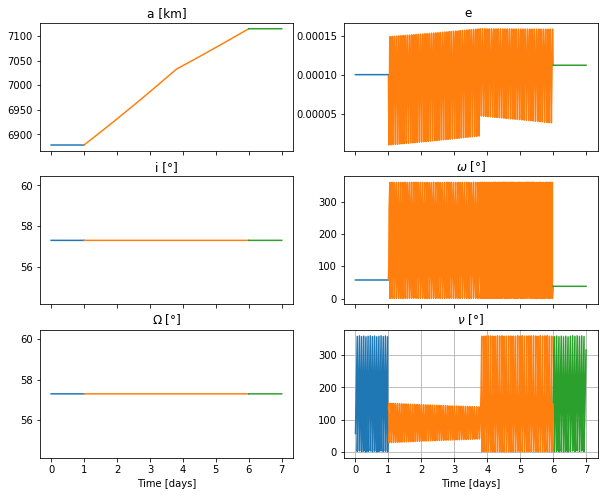

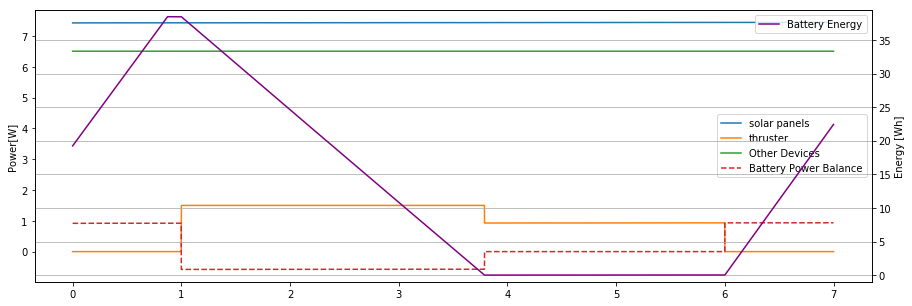

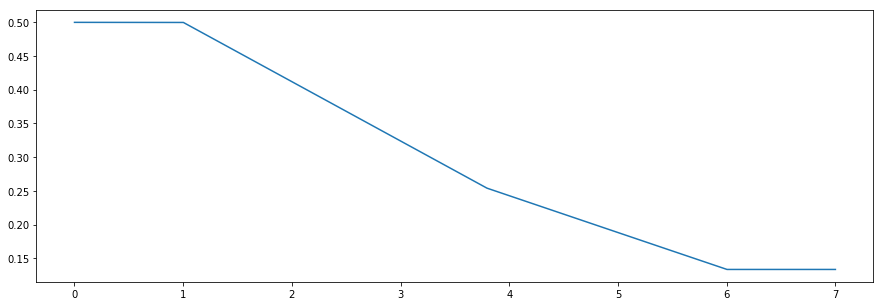

In [321]:
%matplotlib inline
maneuvers.makeReport()
maneuvers.plot("coe")
fig, ax1 = plt.subplots(figsize=(15,5))
PSolarPanels = np.diff(maneuvers.history.energy["solar panels"])/np.diff(maneuvers.history.t)
PThruster = np.diff(maneuvers.history.energy["thruster"])/np.diff(maneuvers.history.t)
PBatteryDischarge = np.ones((len(maneuvers.history.t)))*maneuvers.spacecraft.battery.dischargePower
POtherDevices = np.ones((len(maneuvers.history.t)))*(maneuvers.spacecraft.solarPanels.nominalPower)*0.9

ax1.plot(maneuvers.history.t[:-1]/60/60/24, PSolarPanels,label="solar panels")
ax1.plot(maneuvers.history.t[:-1]/60/60/24, PThruster,label="thruster")
#ax1.plot(maneuvers.history.t/60/60/24, PBatteryDischarge,label="Battery Discharge Capacity")
ax1.plot(maneuvers.history.t/60/60/24,POtherDevices,label="Other Devices")
ax1.plot(maneuvers.history.t[:-1]/60/60/24,PSolarPanels-PThruster-POtherDevices[:-1],label="Battery Power Balance",linestyle="--")
plt.legend()
ax1.set_ylabel("Power[W]")

ax2 = ax1.twinx()
ax2.plot(maneuvers.history.t/60/60/24, maneuvers.history.energy["battery"]/60/60,label="Battery Energy",color="purple")
ax2.set_ylabel("Energy [Wh]")
ax2.set_ylim([-1,maneuvers.spacecraft.battery.energy+1])
plt.legend()
plt.grid()
plt.figure(figsize=(15,5))
plt.plot(maneuvers.history.t/60/60/24,maneuvers.history.propMass)

In [24]:
a = np.array([1,2,3])
b = 0
c = np.array([9,4])
d = np.array
np.hstack((a,b,c))

array([1, 2, 3, 0, 9, 4])